In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [2]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
x_train.shape

170500096/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [3]:
# number of classes
# set contains only unique elements
K = len(set(y_train))
K

10

In [4]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
# x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
# x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)

x = Conv2D(32, (3, 3), activation="relu", padding="same")(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

In [5]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [6]:
# Fit the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3166 - accuracy: 0.5451 - val_loss: 1.1581 - val_accuracy: 0.6089
Epoch 2/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8483 - accuracy: 0.7047 - val_loss: 0.7912 - val_accuracy: 0.7281
Epoch 3/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6887 - accuracy: 0.7624 - val_loss: 0.8976 - val_accuracy: 0.6989
Epoch 4/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.5778 - accuracy: 0.8028 - val_loss: 0.7431 - val_accuracy: 0.7501
Epoch 5/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.4899 - accuracy: 0.8317 - val_loss: 0.5803 - val_accuracy: 0.8057
Epoch 6/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.4147 - accuracy: 0.8566 - val_loss: 0.7369 - val_accuracy: 0.7751
Epoch 7/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.3524 - accuracy: 0.8776 - val_loss: 0.6169 -

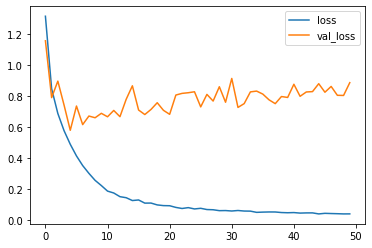

In [7]:
# Loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

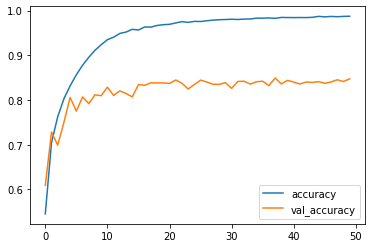

In [8]:
# Accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [9]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 2s 6ms/step - loss: 0.8877 - accuracy: 0.8473
[0.887748122215271, 0.8472999930381775]


Confusion matrix without normalization
[[882   9  23  11   9   7   6   9  33  11]
 [  6 949   3   1   2   2   1   1  11  24]
 [ 39   2 791  26  54  20  44  15   8   1]
 [ 15   4  61 679  53  85  57  25  14   7]
 [ 13   1  31  42 853   9  22  24   4   1]
 [  8   2  51 140  35 722  14  25   1   2]
 [  7   4  22  36  17   5 898   4   5   2]
 [  7   1  14  25  32  17   4 895   1   4]
 [ 46  12   7   4   2   2   5   0 914   8]
 [ 14  53   1   4   5   2   5  10  16 890]]


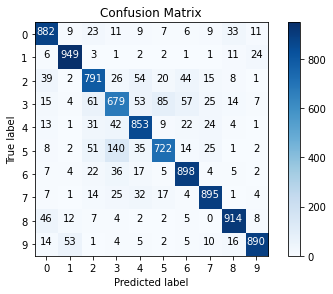

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [11]:
# Label mapping
labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

Text(0.5, 1.0, 'True label: Bird Predicted: Dog')

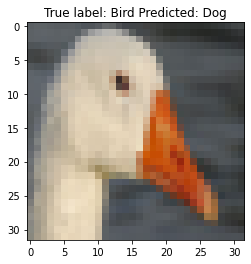

In [12]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32, 32, 3))
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))